# K nearest neighbor ( kNN)


Input: k closest training data (measured by distance).

Output: in k-NN classification: majority vote, output the most common label among the k nearest neighbors.

#### • Non-parametric: no explicit assumptions about models.
#### • Supervised: makes predictions by learning from the past available data
#### • Smaller bias, higher variance compared with linear regression, as k increases, bias increases, variance decreases, can tune k s.t. it minimizes prediction error on validation data.


## Use iris data to implement kNN

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [8]:
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [9]:
dat = pd.read_csv('data/iris.data.txt', header = None, names = names)
dat.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
dat.shape

(150, 5)

In [14]:
X = np.array(dat.iloc[:, 0:4])
y = np.array(dat['class']) 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2019)

In [16]:
# k can be tuned
knn = KNeighborsClassifier(n_neighbors = 3)

In [26]:
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# all predictions are correct for k = 3
print(np.mean(pred == y_test))

1.0


### Tune k by cross validation

k is typically odd for classification to avoid ties.

In [30]:
k_arr = [i for i in range(1, 16, 2)]

In [31]:
cv_scores = []

for k in k_arr:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [33]:
misclass_rate = [1 - x for x in cv_scores]

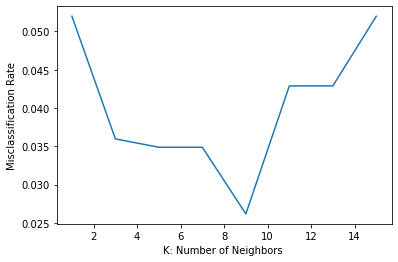

In [35]:
plt.plot(k_arr, misclass_rate)
plt.xlabel('K: Number of Neighbors ')
plt.ylabel('Misclassification Rate')
plt.show()

In [39]:
optimal_k = k_arr[misclass_rate.index(min(misclass_rate))]
print("The optimal number of neighbors is %d." % optimal_k)

The optimal number of neighbors is 9.


## Write our own kNN without using library

In [49]:
class KNN:
    def __init__(self , X_train , y_train , K):
        self.X_train = X_train
        self.y_train = y_train
        self.K = K
        
    def predict(self , X):
        y_pred = np.array([])
        
        for row in X:
            # calculate the distance between observation in test data and each observations of training data
            dist = np.sum((row - self.X_train) ** 2 , axis=1)

            # form 2d numpy array, first column is true label, second column is distance
            y_dist = np.concatenate((self.y_train.reshape(self.y_train.shape[0] , 1), dist.reshape(dist.shape[0],1)) , axis = 1)
            
            # sort the 2d array with ascending distance 
            y_dist = y_dist[y_dist[:, 1].argsort()]

            K_neighbours = y_dist[ : self.K , 0]
            
            # find unique values in a numpy array with frequency & indices
            (values,counts) = np.unique(K_neighbours, return_counts = True)

            # majority vote, use the label with highest frequency as prediction
            y_pred = np.append(y_pred, values[np.argmax(counts)])
            
        return y_pred
    
    
    

In [50]:
KNN_own = KNN(X_train , y_train , 3)
prediction_0  = KNN_own.predict(X_test)

In [53]:
prediction_0

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype='<U32')

In [52]:
print(np.mean(prediction_0 == y_test))

1.0
